In [8]:
import pandas as pd
import numpy as np

In [9]:
import pandas as pd

solar_radiation = pd.read_csv('2017_2019.csv')

# 1. Combine Month, Day, Year into 'Date(M/D/YYYY)' and remove original columns:
solar_radiation['Date(M/D/YYYY)'] = pd.to_datetime(solar_radiation[['Month', 'Day', 'Year']]).dt.strftime('%-m/%-d/%Y')
solar_radiation = solar_radiation.drop(['Month', 'Day', 'Year'], axis=1)

# 2. Combine Hour, Minute, add seconds into 'Time(H:MM:SS)' and remove original columns:
solar_radiation['Time(H:MM:SS)'] = solar_radiation['Hour'].astype(str).str.zfill(1) + ':' + solar_radiation['Minute'].astype(str).str.zfill(2) + ':00'
solar_radiation = solar_radiation.drop(['Hour', 'Minute'], axis=1)

# 3. Remove 'Unnamed: 18' column if it exists:
if 'Unnamed: 18' in solar_radiation.columns:
    solar_radiation = solar_radiation.drop(['Unnamed: 18'], axis=1)



In [10]:
solar_radiation

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Date(M/D/YYYY),Time(H:MM:SS)
0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,1/1/2017,0:00:00
1,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,1/1/2017,0:15:00
2,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,1/1/2017,0:30:00
3,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,1/1/2017,0:45:00
4,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,1/1/2017,1:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,12/31/2019,22:45:00
105116,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,12/31/2019,23:00:00
105117,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,12/31/2019,23:15:00
105118,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,12/31/2019,23:30:00


In [11]:
solar_angles = pd.read_csv('/content/solar_angles_dataset.csv')
solar_angles

,Unnamed: 0,Date (M/D/YYYY),Time (H:MM:SS),Topocentric zenith angle,Top. azimuth angle (eastward from N),Top. azimuth angle (westward from S),Julian day
0,0,1/1/2017,0:00:00,157.863107,308.657327,128.657327,2.457754e+06
1,1,1/1/2017,0:15:00,160.034217,316.136781,136.136781,2.457754e+06
2,2,1/1/2017,0:30:00,161.901608,325.052191,145.052191,2.457754e+06
3,3,1/1/2017,0:45:00,163.360197,335.548911,155.548911,2.457754e+06
4,4,1/1/2017,1:00:00,164.293788,347.499018,167.499018,2.457754e+06
...,...,...,...,...,...,...,...
105211,105211,1/1/2020,22:45:00,144.648900,284.820719,104.820719,2.458850e+06
105212,105212,1/1/2020,23:00:00,147.463622,288.398876,108.398876,2.458850e+06
105213,105213,1/1/2020,23:15:00,150.216607,292.424007,112.424007,2.458850e+06
105214,105214,1/1/2020,23:30:00,152.884991,297.022677,117.022677,2.458850e+06


In [12]:
combined_data = pd.merge(solar_angles, solar_radiation, left_on=['Date (M/D/YYYY)', 'Time (H:MM:SS)'], right_on=['Date(M/D/YYYY)', 'Time(H:MM:SS)'], how='inner')
combined_data

,Unnamed: 0,Date (M/D/YYYY),Time (H:MM:SS),Topocentric zenith angle,Top. azimuth angle (eastward from N),Top. azimuth angle (westward from S),Julian day,Temperature,Clearsky DHI,Clearsky DNI,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Date(M/D/YYYY),Time(H:MM:SS)
0,0,1/1/2017,0:00:00,157.863107,308.657327,128.657327,2.457754e+06,-0.6,0,0,...,0,0,0,86.29,152.92,0.12,1003,1.7,1/1/2017,0:00:00
1,1,1/1/2017,0:15:00,160.034217,316.136781,136.136781,2.457754e+06,-0.6,0,0,...,0,0,0,86.29,150.22,0.12,1003,1.7,1/1/2017,0:15:00
2,2,1/1/2017,0:30:00,161.901608,325.052191,145.052191,2.457754e+06,-0.6,0,0,...,0,0,0,86.29,147.43,0.12,1003,1.7,1/1/2017,0:30:00
3,3,1/1/2017,0:45:00,163.360197,335.548911,155.548911,2.457754e+06,-0.6,0,0,...,0,0,0,85.54,144.60,0.12,1003,1.6,1/1/2017,0:45:00
4,4,1/1/2017,1:00:00,164.293788,347.499018,167.499018,2.457754e+06,-0.7,0,0,...,0,0,0,86.17,141.71,0.12,1003,1.6,1/1/2017,1:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,105115,12/31/2019,22:45:00,144.783756,284.815483,104.815483,2.458849e+06,4.0,0,0,...,0,0,0,100.00,163.63,0.12,999,2.0,12/31/2019,22:45:00
105116,105116,12/31/2019,23:00:00,147.598548,288.399718,108.399718,2.458849e+06,3.9,0,0,...,0,0,0,100.00,162.09,0.12,999,2.0,12/31/2019,23:00:00
105117,105117,12/31/2019,23:15:00,150.351476,292.434205,112.434205,2.458849e+06,3.9,0,0,...,0,0,0,100.00,160.16,0.12,999,2.0,12/31/2019,23:15:00
105118,105118,12/31/2019,23:30:00,153.019537,297.047016,117.047016,2.458849e+06,3.9,0,0,...,0,0,0,100.00,157.93,0.12,999,2.0,12/31/2019,23:30:00


In [13]:
combined_data['datetime_str'] = combined_data['Date (M/D/YYYY)'] + ' ' + combined_data['Time (H:MM:SS)']

# 2. Convert the 'datetime_str' column to pandas datetime format (optimized for large datasets)
combined_data['datetime'] = pd.to_datetime(combined_data['datetime_str'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

# 3. Remove the intermediate 'datetime_str' column if it's no longer needed
combined_data.drop(columns=['datetime_str'], inplace=True)

# 4. Convert the 'datetime' column to ISO format (YYYY-MM-DDTHH:MM:SS)
combined_data['datetime'] = combined_data['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%S')
combined_data.drop(columns=['Date (M/D/YYYY)', 'Time (H:MM:SS)'], inplace=True)
combined_data


,Unnamed: 0,Topocentric zenith angle,Top. azimuth angle (eastward from N),Top. azimuth angle (westward from S),Julian day,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Date(M/D/YYYY),Time(H:MM:SS),datetime
0,0,157.863107,308.657327,128.657327,2.457754e+06,-0.6,0,0,0,-2.6,...,0,0,86.29,152.92,0.12,1003,1.7,1/1/2017,0:00:00,2017-01-01T00:00:00
1,1,160.034217,316.136781,136.136781,2.457754e+06,-0.6,0,0,0,-2.6,...,0,0,86.29,150.22,0.12,1003,1.7,1/1/2017,0:15:00,2017-01-01T00:15:00
2,2,161.901608,325.052191,145.052191,2.457754e+06,-0.6,0,0,0,-2.6,...,0,0,86.29,147.43,0.12,1003,1.7,1/1/2017,0:30:00,2017-01-01T00:30:00
3,3,163.360197,335.548911,155.548911,2.457754e+06,-0.6,0,0,0,-2.7,...,0,0,85.54,144.60,0.12,1003,1.6,1/1/2017,0:45:00,2017-01-01T00:45:00
4,4,164.293788,347.499018,167.499018,2.457754e+06,-0.7,0,0,0,-2.7,...,0,0,86.17,141.71,0.12,1003,1.6,1/1/2017,1:00:00,2017-01-01T01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,105115,144.783756,284.815483,104.815483,2.458849e+06,4.0,0,0,0,4.0,...,0,0,100.00,163.63,0.12,999,2.0,12/31/2019,22:45:00,2019-12-31T22:45:00
105116,105116,147.598548,288.399718,108.399718,2.458849e+06,3.9,0,0,0,3.9,...,0,0,100.00,162.09,0.12,999,2.0,12/31/2019,23:00:00,2019-12-31T23:00:00
105117,105117,150.351476,292.434205,112.434205,2.458849e+06,3.9,0,0,0,3.9,...,0,0,100.00,160.16,0.12,999,2.0,12/31/2019,23:15:00,2019-12-31T23:15:00
105118,105118,153.019537,297.047016,117.047016,2.458849e+06,3.9,0,0,0,3.9,...,0,0,100.00,157.93,0.12,999,2.0,12/31/2019,23:30:00,2019-12-31T23:30:00


In [14]:
meterological_data = pd.read_csv('/content/Meterologic (1).csv')
meterological_data

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Izmir,Turkey",2017-01-01T00:00:00,1.8,0.4,-3.5,68.32,0.0,0,NaN,0.0,...,1025.1,0.0,19.8,0.0,0.0,0,NaN,Clear,clear-night,"17232099999,17219099999,LTBJ,17220099999,17218..."
1,"Izmir,Turkey",2017-01-01T01:00:00,0.4,-1.2,-3.5,74.76,0.0,0,NaN,0.0,...,1025.1,0.0,19.5,0.0,0.0,0,NaN,Clear,clear-night,"17219099999,LTBJ,17220099999,17218099999,17186..."
2,"Izmir,Turkey",2017-01-01T02:00:00,0.9,-0.6,-3.5,72.23,0.0,0,NaN,0.0,...,1025.0,0.0,19.5,0.0,0.0,0,NaN,Clear,clear-night,"17219099999,LTBJ,17220099999,17218099999,17186..."
3,"Izmir,Turkey",2017-01-01T03:00:00,-0.1,-0.1,-3.5,78.21,0.0,0,NaN,0.0,...,1024.9,0.0,19.5,0.0,0.0,0,NaN,Clear,clear-night,"17219099999,17220099999,17218099999,17186099999"
4,"Izmir,Turkey",2017-01-01T04:00:00,-0.7,-0.7,-3.6,80.75,0.0,0,NaN,0.0,...,1025.1,0.0,19.5,0.0,0.0,0,NaN,Clear,clear-night,"17219099999,LTBJ,17220099999,17218099999,17186..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"Izmir,Turkey",2017-02-10T19:00:00,12.1,12.1,4.9,61.27,0.0,0,NaN,0.0,...,1019.4,30.4,8.1,22.1,0.1,0,NaN,Partially cloudy,partly-cloudy-night,"17232099999,17219099999,LTBJ,17220099999,17218..."
980,"Izmir,Turkey",2017-02-10T20:00:00,11.4,11.4,4.6,62.60,0.0,0,NaN,0.0,...,1019.6,31.3,8.1,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"17232099999,17219099999,LTBJ,17220099999,17218..."
981,"Izmir,Turkey",2017-02-10T21:00:00,10.5,10.5,3.8,63.22,0.0,0,NaN,0.0,...,1020.1,30.8,8.2,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"17232099999,17219099999,LTBJ,17220099999,17218..."
982,"Izmir,Turkey",2017-02-10T22:00:00,9.6,8.0,3.4,65.12,0.0,0,NaN,0.0,...,1020.3,58.8,11.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"17232099999,17219099999,LTBJ,17220099999,17218..."


In [15]:
# Assuming the original dataset is loaded as 'metrological_data'
# Extract the required columns
columns_to_extract = ['name', 'datetime', 'temp', 'dew', 'humidity', 'sealevelpressure', 'visibility', 'conditions']

# Create the new dataset by selecting the specified columns
new_metrological_data = meterological_data[columns_to_extract]

# Display the new dataset to verify the result
print(new_metrological_data)


             name             datetime  temp  dew  humidity  sealevelpressure  \
0    Izmir,Turkey  2017-01-01T00:00:00   1.8 -3.5     68.32            1025.1   
1    Izmir,Turkey  2017-01-01T01:00:00   0.4 -3.5     74.76            1025.1   
2    Izmir,Turkey  2017-01-01T02:00:00   0.9 -3.5     72.23            1025.0   
3    Izmir,Turkey  2017-01-01T03:00:00  -0.1 -3.5     78.21            1024.9   
4    Izmir,Turkey  2017-01-01T04:00:00  -0.7 -3.6     80.75            1025.1   
..            ...                  ...   ...  ...       ...               ...   
979  Izmir,Turkey  2017-02-10T19:00:00  12.1  4.9     61.27            1019.4   
980  Izmir,Turkey  2017-02-10T20:00:00  11.4  4.6     62.60            1019.6   
981  Izmir,Turkey  2017-02-10T21:00:00  10.5  3.8     63.22            1020.1   
982  Izmir,Turkey  2017-02-10T22:00:00   9.6  3.4     65.12            1020.3   
983  Izmir,Turkey  2017-02-10T23:00:00   9.1  3.1     66.29            1020.4   

     visibility        cond

In [16]:
# Add 'latitude' and 'longitude' columns with default values
new_metrological_data['latitude'] = 38.433
new_metrological_data['longitude'] = 27.167

# Update the 'latitude' and 'longitude' values only for records where 'name' is 'Izmir,Turkey'
new_metrological_data.loc[new_metrological_data['name'] == 'Izmir,Turkey', ['latitude', 'longitude']] = 38.433, 27.167

# Display the updated dataset to verify the result
print(new_metrological_data)


             name             datetime  temp  dew  humidity  sealevelpressure  \
0    Izmir,Turkey  2017-01-01T00:00:00   1.8 -3.5     68.32            1025.1   
1    Izmir,Turkey  2017-01-01T01:00:00   0.4 -3.5     74.76            1025.1   
2    Izmir,Turkey  2017-01-01T02:00:00   0.9 -3.5     72.23            1025.0   
3    Izmir,Turkey  2017-01-01T03:00:00  -0.1 -3.5     78.21            1024.9   
4    Izmir,Turkey  2017-01-01T04:00:00  -0.7 -3.6     80.75            1025.1   
..            ...                  ...   ...  ...       ...               ...   
979  Izmir,Turkey  2017-02-10T19:00:00  12.1  4.9     61.27            1019.4   
980  Izmir,Turkey  2017-02-10T20:00:00  11.4  4.6     62.60            1019.6   
981  Izmir,Turkey  2017-02-10T21:00:00  10.5  3.8     63.22            1020.1   
982  Izmir,Turkey  2017-02-10T22:00:00   9.6  3.4     65.12            1020.3   
983  Izmir,Turkey  2017-02-10T23:00:00   9.1  3.1     66.29            1020.4   

     visibility        cond

<ipython-input-16-d59247c8893d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_metrological_data['latitude'] = 38.433
<ipython-input-16-d59247c8893d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_metrological_data['longitude'] = 27.167


In [17]:
# Merge the two datasets on the 'datetime' column
final_dataset = pd.merge(combined_data, new_metrological_data, on='datetime', how='inner')
final_dataset


,Unnamed: 0,Topocentric zenith angle,Top. azimuth angle (eastward from N),Top. azimuth angle (westward from S),Julian day,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,datetime,name,temp,dew,humidity,sealevelpressure,visibility,conditions,latitude,longitude
0,0,157.863107,308.657327,128.657327,2.457754e+06,-0.6,0,0,0,-2.6,...,2017-01-01T00:00:00,"Izmir,Turkey",1.8,-3.5,68.32,1025.1,19.8,Clear,38.433,27.167
1,4,164.293788,347.499018,167.499018,2.457754e+06,-0.7,0,0,0,-2.7,...,2017-01-01T01:00:00,"Izmir,Turkey",0.4,-3.5,74.76,1025.1,19.5,Clear,38.433,27.167
2,8,161.807943,35.448422,215.448422,2.457754e+06,-0.8,0,0,0,-2.8,...,2017-01-01T02:00:00,"Izmir,Turkey",0.9,-3.5,72.23,1025.0,19.5,Clear,38.433,27.167
3,12,152.773064,63.211637,243.211637,2.457754e+06,-1.0,0,0,0,-2.8,...,2017-01-01T03:00:00,"Izmir,Turkey",-0.1,-3.5,78.21,1024.9,19.5,Clear,38.433,27.167
4,16,141.661226,78.547120,258.547120,2.457755e+06,-1.1,0,0,0,-2.8,...,2017-01-01T04:00:00,"Izmir,Turkey",-0.7,-3.6,80.75,1025.1,19.5,Clear,38.433,27.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3916,93.881733,255.009789,75.009789,2.457795e+06,8.7,0,0,0,6.5,...,2017-02-10T19:00:00,"Izmir,Turkey",12.1,4.9,61.27,1019.4,8.1,Partially cloudy,38.433,27.167
980,3920,105.420744,264.005961,84.005961,2.457795e+06,8.1,0,0,0,6.1,...,2017-02-10T20:00:00,"Izmir,Turkey",11.4,4.6,62.60,1019.6,8.1,Partially cloudy,38.433,27.167
981,3924,117.151512,273.258204,93.258204,2.457795e+06,7.8,0,0,0,6.0,...,2017-02-10T21:00:00,"Izmir,Turkey",10.5,3.8,63.22,1020.1,8.2,Partially cloudy,38.433,27.167
982,3928,128.757683,283.750859,103.750859,2.457795e+06,7.6,0,0,0,5.9,...,2017-02-10T22:00:00,"Izmir,Turkey",9.6,3.4,65.12,1020.3,11.9,Partially cloudy,38.433,27.167


In [18]:
print((final_dataset['sealevelpressure'].min(), final_dataset['sealevelpressure'].max()))

(999.9, 1032.1)


In [19]:
final_dataset = final_dataset.drop(columns=['Unnamed: 0'])
print(final_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Topocentric zenith angle              984 non-null    float64
 1   Top. azimuth angle (eastward from N)  984 non-null    float64
 2   Top. azimuth angle (westward from S)  984 non-null    float64
 3   Julian day                            984 non-null    float64
 4   Temperature                           984 non-null    float64
 5   Clearsky DHI                          984 non-null    int64  
 6   Clearsky DNI                          984 non-null    int64  
 7   Clearsky GHI                          984 non-null    int64  
 8   Dew Point                             984 non-null    float64
 9   DHI                                   984 non-null    int64  
 10  DNI                                   984 non-null    int64  
 11  GHI                

In [20]:
final_dataset[['latitude', 'longitude']] = final_dataset[['latitude', 'longitude']].fillna(method='ffill')  # Forward fill missing values

<ipython-input-20-174754ab0dc3>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_dataset[['latitude', 'longitude']] = final_dataset[['latitude', 'longitude']].fillna(method='ffill')  # Forward fill missing values


In [21]:
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 69.2 MB/s eta 0:00:00


In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [23]:
data = final_dataset

# Step 2: Preprocessing - Handle missing values
data = data.dropna()

In [24]:
features = ['Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
            'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
            'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point']

In [25]:
data['Tilt'] = data['Topocentric zenith angle']  # Assuming Tilt = Zenith for simplicity
target = ['Top. azimuth angle (eastward from N)', 'Topocentric zenith angle', 'Tilt']

In [26]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])

In [27]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [28]:
X = scaled_features
y = data[target].values


In [29]:
# Reshape X for LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [30]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape X back to 2D before feeding it to the Dense layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # input_dim updated
model.add(Dense(32, activation='relu'))
model.add(Dense(3))  # 3 outputs: Azimuth, Zenith, Tilt

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 21167.4023 - val_loss: 21476.8809
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21706.9961 - val_loss: 20971.3516
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 20573.8066 - val_loss: 19751.0703
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18662.1895 - val_loss: 17351.2305
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16732.7559 - val_loss: 13660.8545
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13612.1953 - val_loss: 9426.8428
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9234.4062 - val_loss: 6201.1084
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6311.2207 - val_loss: 4762.4292
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4729.9409 - val_loss: 4193.4565
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3927.4495 - val_loss: 3762.1387
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3309.4265 - val_

In [32]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5031 - val_loss: 21.7239
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2646 - val_loss: 20.8457
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.8983 - val_loss: 18.0918
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3139 - val_loss: 19.6688
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.2353 - val_loss: 15.9919
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2702 - val_loss: 16.6778
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.5779 - val_loss: 15.8677
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6684 - val_loss: 15.2028
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7719 - val_loss: 14.7420
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4445 - val_loss: 12.7697
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4549 - val_loss: 13.6090
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

In [33]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9397 
Test Loss: 3.3134660720825195


In [34]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


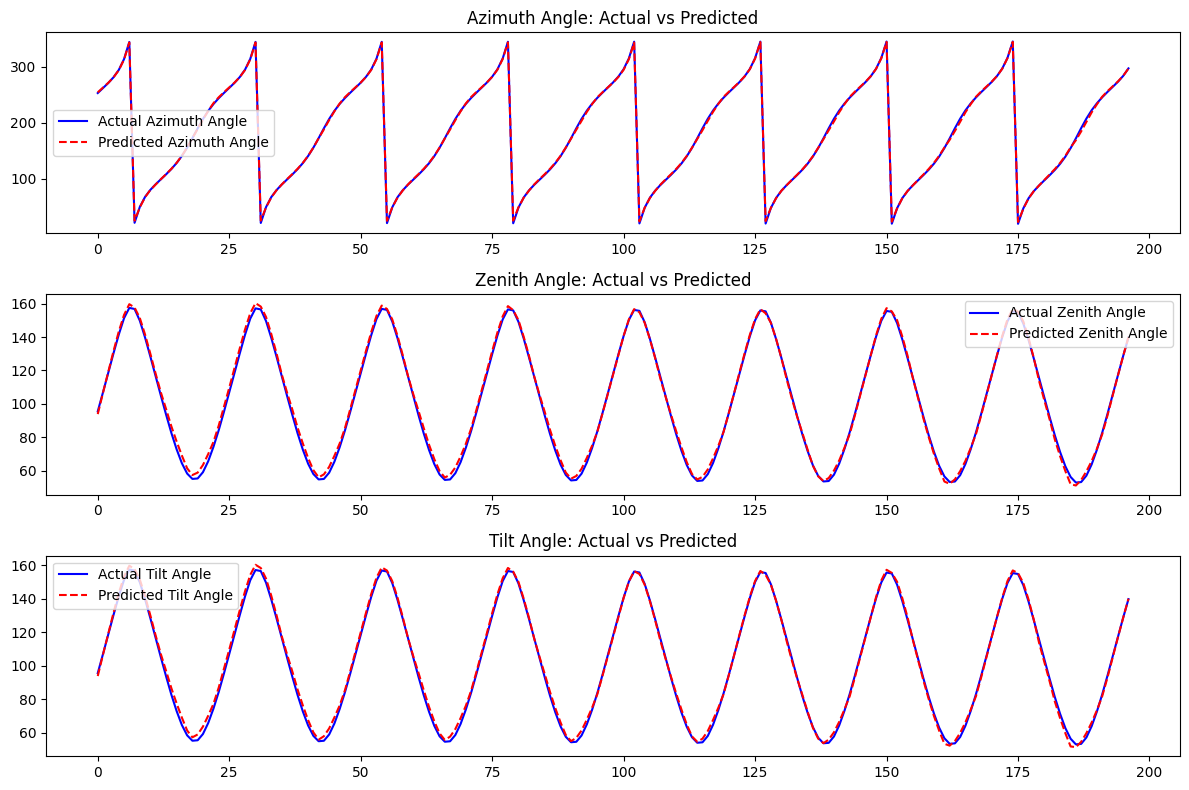

In [35]:
plt.figure(figsize=(12, 8))

# Plot Azimuth Angle
plt.subplot(3, 1, 1)
plt.plot(y_test[:, 0], label='Actual Azimuth Angle', color='blue')
plt.plot(y_pred[:, 0], label='Predicted Azimuth Angle', color='red', linestyle='--')
plt.title('Azimuth Angle: Actual vs Predicted')
plt.legend()

# Plot Zenith Angle
plt.subplot(3, 1, 2)
plt.plot(y_test[:, 1], label='Actual Zenith Angle', color='blue')
plt.plot(y_pred[:, 1], label='Predicted Zenith Angle', color='red', linestyle='--')
plt.title('Zenith Angle: Actual vs Predicted')
plt.legend()

# Plot Tilt Angle (if separate)
plt.subplot(3, 1, 3)
plt.plot(y_test[:, 2], label='Actual Tilt Angle', color='blue')
plt.plot(y_pred[:, 2], label='Predicted Tilt Angle', color='red', linestyle='--')
plt.title('Tilt Angle: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict values
y_pred = model.predict(X_test)

# Calculate MAE and R² Score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error (MAE): 1.4213073503203155
R² Score: 0.9978568069201339


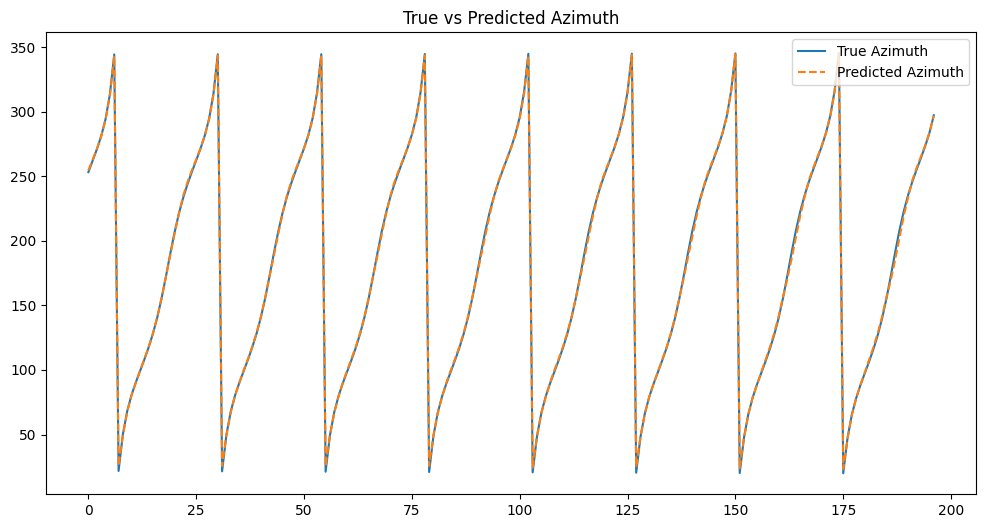

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='True Azimuth')
plt.plot(y_pred[:, 0], label='Predicted Azimuth', linestyle='--')
plt.legend()
plt.title('True vs Predicted Azimuth')
plt.show()

# Repeat for Zenith and Tilt


In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the individual predictions for Azimuth, Zenith, and Tilt
predicted_azimuth = y_pred[:, 0]  # Azimuth is in the first column
predicted_zenith = y_pred[:, 1]   # Zenith is in the second column
predicted_tilt = y_pred[:, 2]     # Tilt is in the third column

# Display the first few predictions
print(f"Predicted Azimuth: {predicted_azimuth[:5]}")
print(f"Predicted Zenith: {predicted_zenith[:5]}")
print(f"Predicted Tilt: {predicted_tilt[:5]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicted Azimuth: [254.43546 262.85226 271.3938  281.20795 293.90976]
Predicted Zenith: [ 93.896065 106.71175  119.22752  131.65384  143.36642 ]
Predicted Tilt: [ 93.77267 106.6425  119.18323 131.64171 143.38213]


In [39]:
# True values (actual angles) from y_test
true_azimuth = y_test[:, 0]
true_zenith = y_test[:, 1]
true_tilt = y_test[:, 2]

# Print comparison for the first 5 predictions
for i in range(5):
    print(f"Prediction {i+1}:")
    print(f"  Predicted Azimuth: {predicted_azimuth[i]}, True Azimuth: {true_azimuth[i]}")
    print(f"  Predicted Zenith: {predicted_zenith[i]}, True Zenith: {true_zenith[i]}")
    print(f"  Predicted Tilt: {predicted_tilt[i]}, True Tilt: {true_tilt[i]}")
    print()


Prediction 1:
  Predicted Azimuth: 254.43545532226562, True Azimuth: 253.131562
  Predicted Zenith: 93.89606475830078, True Zenith: 95.519374
  Predicted Tilt: 93.77266693115234, True Tilt: 95.519374

Prediction 2:
  Predicted Azimuth: 262.8522644042969, True Azimuth: 261.985976
  Predicted Zenith: 106.71174621582031, True Zenith: 106.979629
  Predicted Tilt: 106.64250183105469, True Tilt: 106.979629

Prediction 3:
  Predicted Azimuth: 271.393798828125, True Azimuth: 271.044512
  Predicted Zenith: 119.22752380371094, True Zenith: 118.692305
  Predicted Tilt: 119.1832275390625, True Tilt: 118.692305

Prediction 4:
  Predicted Azimuth: 281.20794677734375, True Azimuth: 281.275596
  Predicted Zenith: 131.65383911132812, True Zenith: 130.359363
  Predicted Tilt: 131.64170837402344, True Tilt: 130.359363

Prediction 5:
  Predicted Azimuth: 293.9097595214844, True Azimuth: 294.36654
  Predicted Zenith: 143.36642456054688, True Zenith: 141.538959
  Predicted Tilt: 143.3821258544922, True Tilt

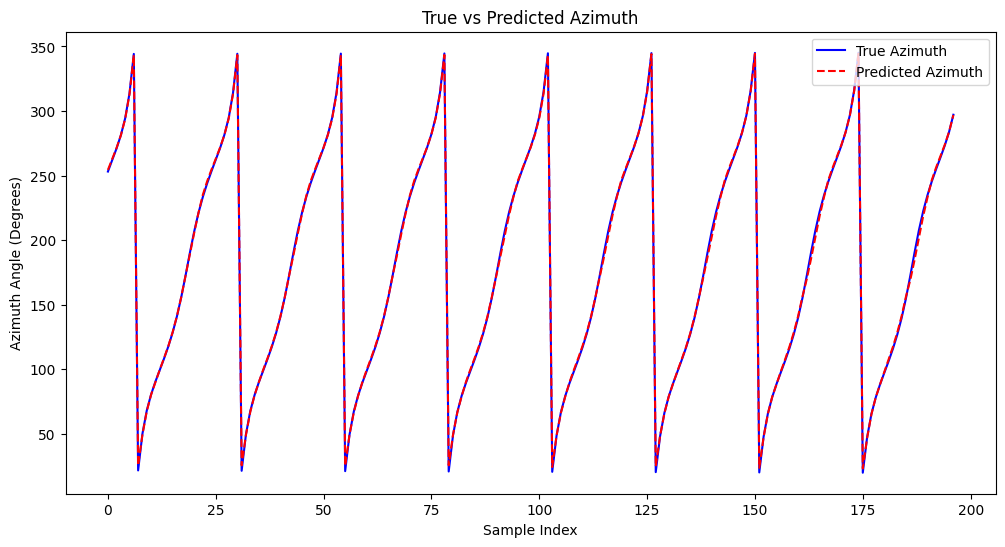

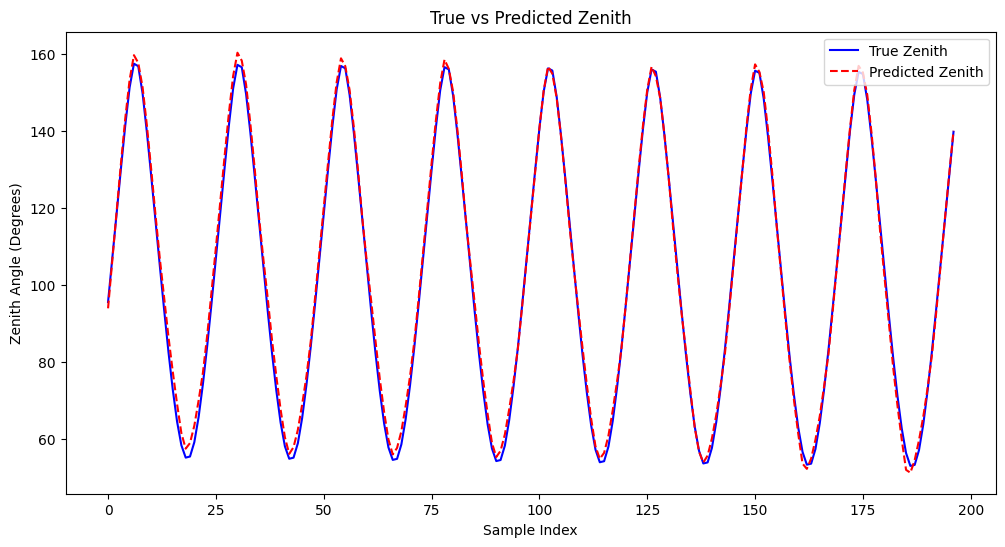

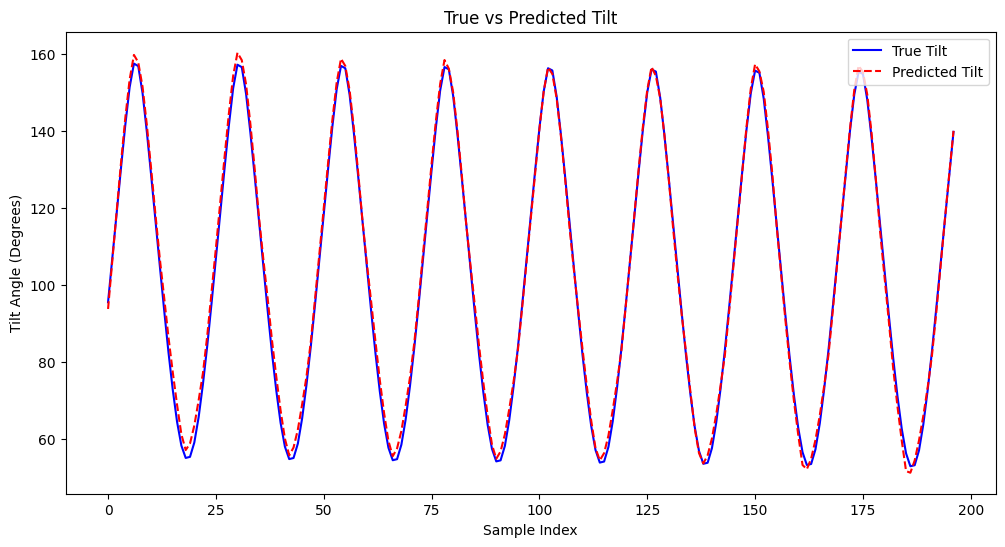

In [40]:
import matplotlib.pyplot as plt

# Plot for Azimuth
plt.figure(figsize=(12, 6))
plt.plot(true_azimuth, label='True Azimuth', linestyle='-', color='blue')
plt.plot(predicted_azimuth, label='Predicted Azimuth', linestyle='--', color='red')
plt.title('True vs Predicted Azimuth')
plt.xlabel('Sample Index')
plt.ylabel('Azimuth Angle (Degrees)')
plt.legend()
plt.show()

# Plot for Zenith
plt.figure(figsize=(12, 6))
plt.plot(true_zenith, label='True Zenith', linestyle='-', color='blue')
plt.plot(predicted_zenith, label='Predicted Zenith', linestyle='--', color='red')
plt.title('True vs Predicted Zenith')
plt.xlabel('Sample Index')
plt.ylabel('Zenith Angle (Degrees)')
plt.legend()
plt.show()

# Plot for Tilt
plt.figure(figsize=(12, 6))
plt.plot(true_tilt, label='True Tilt', linestyle='-', color='blue')
plt.plot(predicted_tilt, label='Predicted Tilt', linestyle='--', color='red')
plt.title('True vs Predicted Tilt')
plt.xlabel('Sample Index')
plt.ylabel('Tilt Angle (Degrees)')
plt.legend()
plt.show()


In [41]:
model.save('solar_angle_model.h5')


In [42]:
# Load the fitted scaler from disk (if saved previously)
scaler = joblib.load('scaler.pkl')


In [43]:
import numpy as np
import pandas as pd

# Feature set: These should be the features the model expects during prediction
features = [
    'Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
    'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
    'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point'
]

# New dynamic input data (replace this with actual real-time data)
new_data = {
    'Temperature': 30.0,  # Example temperature in °C
    'Relative Humidity': 50.0,  # Example relative humidity in %
    'Clearsky DHI': 600,  # Example Clearsky Diffuse Horizontal Irradiance in W/m²
    'Clearsky DNI': 1000,  # Example Clearsky Direct Normal Irradiance in W/m²
    'Clearsky GHI': 1600,  # Example Clearsky Global Horizontal Irradiance in W/m²
    'Dew Point': 18.0,  # Example dew point in °C
    'Latitude': 38.433,  # Latitude (Izmir, Turkey)
    'Longitude': 27.167,  # Longitude (Izmir, Turkey)
    'Solar Zenith Angle': 15.0,  # Example Solar Zenith Angle in degrees
    'Pressure': 1015,  # Pressure in hPa
    'Top. azimuth angle (eastward from N)': 180,  # Example azimuth angle in degrees
    'Topocentric zenith angle': 45,  # Example zenith angle in degrees
    'Wind Speed': 5.0,  # Example wind speed in m/s
}

# Create the DataFrame with the correct column order (ensure the order matches your features list)
input_data_df = pd.DataFrame([new_data], columns=features)

# Check the columns and ensure they match (Optional)
print("Input data columns:", input_data_df.columns)

# Now, scale the dynamic input data using the previously fitted scaler
scaled_input = scaler.transform(input_data_df)

# Proceed with prediction (model is assumed to be defined and trained)
try:
    # Predict the angles (Azimuth, Zenith, and Tilt) using the model
    predicted_angles = model.predict(scaled_input)

    # Extract the predicted values
    predicted_azimuth = predicted_angles[0][0]  # Azimuth
    predicted_zenith = predicted_angles[0][1]   # Zenith
    predicted_tilt = predicted_angles[0][2]     # Tilt

    # Clip the predicted angles to their valid ranges
    predicted_azimuth = np.clip(predicted_azimuth, 0, 360)  # Azimuth should be between 0 and 360
    predicted_zenith = np.clip(predicted_zenith, 0, 90)  # Zenith should be between 0 and 90
    predicted_tilt = np.clip(predicted_tilt, 0, 90)  # Tilt should be between 0 and 90

    # Display the clipped predicted angles
    print(f"Predicted Azimuth (clipped): {predicted_azimuth:.2f} degrees")
    print(f"Predicted Zenith (clipped): {predicted_zenith:.2f} degrees")
    print(f"Predicted Tilt (clipped): {predicted_tilt:.2f} degrees")

except Exception as e:
    print(f"Error during prediction: {e}")


Input data columns: Index(['Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
       'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Azimuth (clipped): 187.95 degrees
Predicted Zenith (clipped): 54.46 degrees
Predicted Tilt (clipped): 55.18 degrees


In [44]:
import numpy as np
import pandas as pd

# Feature set: These should be the features the model expects during prediction
features = [
    'Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
    'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
    'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point'
]

# New dynamic input data for Bhimavaram (replace this with actual real-time data if available)
new_data = {
    'Temperature': 32.0,  # Example temperature in °C (may vary, using an average summer temperature)
    'Relative Humidity': 60.0,  # Example relative humidity in %
    'Clearsky DHI': 700,  # Example Clearsky Diffuse Horizontal Irradiance in W/m²
    'Clearsky DNI': 1100,  # Example Clearsky Direct Normal Irradiance in W/m²
    'Clearsky GHI': 1700,  # Example Clearsky Global Horizontal Irradiance in W/m²
    'Dew Point': 20.0,  # Example dew point in °C
    'Latitude': 16.5393,  # Latitude for Bhimavaram
    'Longitude': 81.5375,  # Longitude for Bhimavaram
    'Solar Zenith Angle': 53.45,  # Calculated from the formula (as shown earlier)
}

# Missing features (add them with default or placeholder values if required)
new_data.update({
    'Pressure': 1015,  # Pressure in hPa (default or estimated)
    'Top. azimuth angle (eastward from N)': 180,  # Example azimuth angle in degrees
    'Topocentric zenith angle': 45,  # Example zenith angle in degrees (adjusted based on local conditions)
    'Wind Speed': 5.0,  # Example wind speed in m/s (adjusted to typical values for this region)
})

# Create the DataFrame with the correct column order (ensure the order matches your model's feature set)
input_data_df = pd.DataFrame([new_data], columns=features)

# Check the columns and ensure they match
print("Input data columns:", input_data_df.columns)

# Scale the dynamic input data using the previously fitted scaler (assuming the scaler is already defined and fitted)
scaled_input = scaler.transform(input_data_df)

# Proceed with prediction (model is assumed to be defined and trained)
try:
    # Predict the angles (Azimuth, Zenith, and Tilt) using the model
    predicted_angles = model.predict(scaled_input)

    # Extract the predicted values
    predicted_azimuth = predicted_angles[0][0]  # Azimuth
    predicted_zenith = predicted_angles[0][1]   # Zenith
    predicted_tilt = predicted_angles[0][2]     # Tilt

    # Clip the predicted angles to their valid ranges
    predicted_azimuth = np.clip(predicted_azimuth, 0, 360)  # Azimuth should be between 0 and 360
    predicted_zenith = np.clip(predicted_zenith, 0, 90)  # Zenith should be between 0 and 90
    predicted_tilt = np.clip(predicted_tilt, 0, 90)  # Tilt should be between 0 and 90

    # Display the clipped predicted angles
    print(f"Predicted Azimuth (clipped): {predicted_azimuth:.2f} degrees")
    print(f"Predicted Zenith (clipped): {predicted_zenith:.2f} degrees")
    print(f"Predicted Tilt (clipped): {predicted_tilt:.2f} degrees")

except Exception as e:
    print(f"Error during prediction: {e}")


Input data columns: Index(['Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
       'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Azimuth (clipped): 194.26 degrees
Predicted Zenith (clipped): 56.08 degrees
Predicted Tilt (clipped): 56.85 degrees


In [45]:
import numpy as np


# Function to convert azimuth angle into cardinal direction (for simplicity, 0-360 degrees)
def azimuth_to_direction(azimuth):
    if azimuth >= 337.5 or azimuth < 22.5:
        return 'North'
    elif azimuth >= 22.5 and azimuth < 67.5:
        return 'North-East'
    elif azimuth >= 67.5 and azimuth < 112.5:
        return 'East'
    elif azimuth >= 112.5 and azimuth < 157.5:
        return 'South-East'
    elif azimuth >= 157.5 and azimuth < 202.5:
        return 'South'
    elif azimuth >= 202.5 and azimuth < 247.5:
        return 'South-West'
    elif azimuth >= 247.5 and azimuth < 292.5:
        return 'West'
    elif azimuth >= 292.5 and azimuth < 337.5:
        return 'North-West'

# Convert azimuth to cardinal direction
azimuth_direction = azimuth_to_direction(predicted_azimuth)

# Descriptive answer
description = f"Azimuth: {predicted_azimuth:.2f}° ({azimuth_direction}), Zenith: {predicted_zenith:.2f}°, Tilt: {predicted_tilt:.2f}°"

# Output the result
print(description)


Azimuth: 194.26° (South), Zenith: 56.08°, Tilt: 56.85°


# ***Deployment***

In [48]:
pip install streamlit keras tensorflow joblib pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [49]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from keras.models import load_model

# Load model and scaler
model = load_model("solar_angle_model.h5")
scaler = joblib.load("scaler.pkl")

# UI Title
st.title("Solar Angle Prediction")

# User Input Form
st.sidebar.header("Input Parameters")
temperature = st.sidebar.number_input("Temperature (°C)", min_value=-50.0, max_value=50.0, value=30.0)
humidity = st.sidebar.number_input("Relative Humidity (%)", min_value=0.0, max_value=100.0, value=50.0)
clearsky_dhi = st.sidebar.number_input("Clearsky DHI (W/m²)", min_value=0.0, value=600.0)
clearsky_dni = st.sidebar.number_input("Clearsky DNI (W/m²)", min_value=0.0, value=1000.0)
clearsky_ghi = st.sidebar.number_input("Clearsky GHI (W/m²)", min_value=0.0, value=1600.0)
dew_point = st.sidebar.number_input("Dew Point (°C)", min_value=-50.0, max_value=50.0, value=18.0)
pressure = st.sidebar.number_input("Pressure (hPa)", min_value=800.0, max_value=1100.0, value=1015.0)
wind_speed = st.sidebar.number_input("Wind Speed (m/s)", min_value=0.0, value=5.0)
topo_azimuth = st.sidebar.number_input("Topocentric Azimuth Angle (°)", min_value=0.0, max_value=360.0, value=180.0)
topo_zenith = st.sidebar.number_input("Topocentric Zenith Angle (°)", min_value=0.0, max_value=90.0, value=45.0)

# Prepare input
input_data = pd.DataFrame([[topo_zenith, topo_azimuth, temperature, clearsky_dhi, clearsky_dni,
                            clearsky_ghi, humidity, wind_speed, pressure, dew_point]],
                          columns=['Topocentric zenith angle', 'Top. azimuth angle (eastward from N)',
                                   'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
                                   'Relative Humidity', 'Wind Speed', 'Pressure', 'Dew Point'])

# Scale input
scaled_input = scaler.transform(input_data)

# Predict
if st.button("Predict Solar Angles"):
    prediction = model.predict(scaled_input)[0]

    # Clip values
    azimuth = np.clip(prediction[0], 0, 360)
    zenith = np.clip(prediction[1], 0, 90)
    tilt = np.clip(prediction[2], 0, 90)

    # Convert azimuth to direction
    def azimuth_to_direction(azimuth):
        directions = ['North', 'North-East', 'East', 'South-East', 'South', 'South-West', 'West', 'North-West']
        return directions[int((azimuth + 22.5) // 45) % 8]

    azimuth_direction = azimuth_to_direction(azimuth)

    # Display results
    st.success(f"Predicted Azimuth: {azimuth:.2f}° ({azimuth_direction})")
    st.success(f"Predicted Zenith: {zenith:.2f}°")
    st.success(f"Predicted Tilt: {tilt:.2f}°")


2025-03-09 11:05:26.361 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.580 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-09 11:05:26.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 11:05:26.598 Thread 'MainThread': mi